# NAME- SOHIT PATHAK

# ROLL NO: - MA22M019

1) (a ) Plot the sigmoid function. Print your interpretation on why this function is useful for a classification problem.

     b)Implement Logistic regression using the data provided (Logistic_regression_ls.csv) and plot the decision boundary (linear).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1/(1 + np.exp(-z))

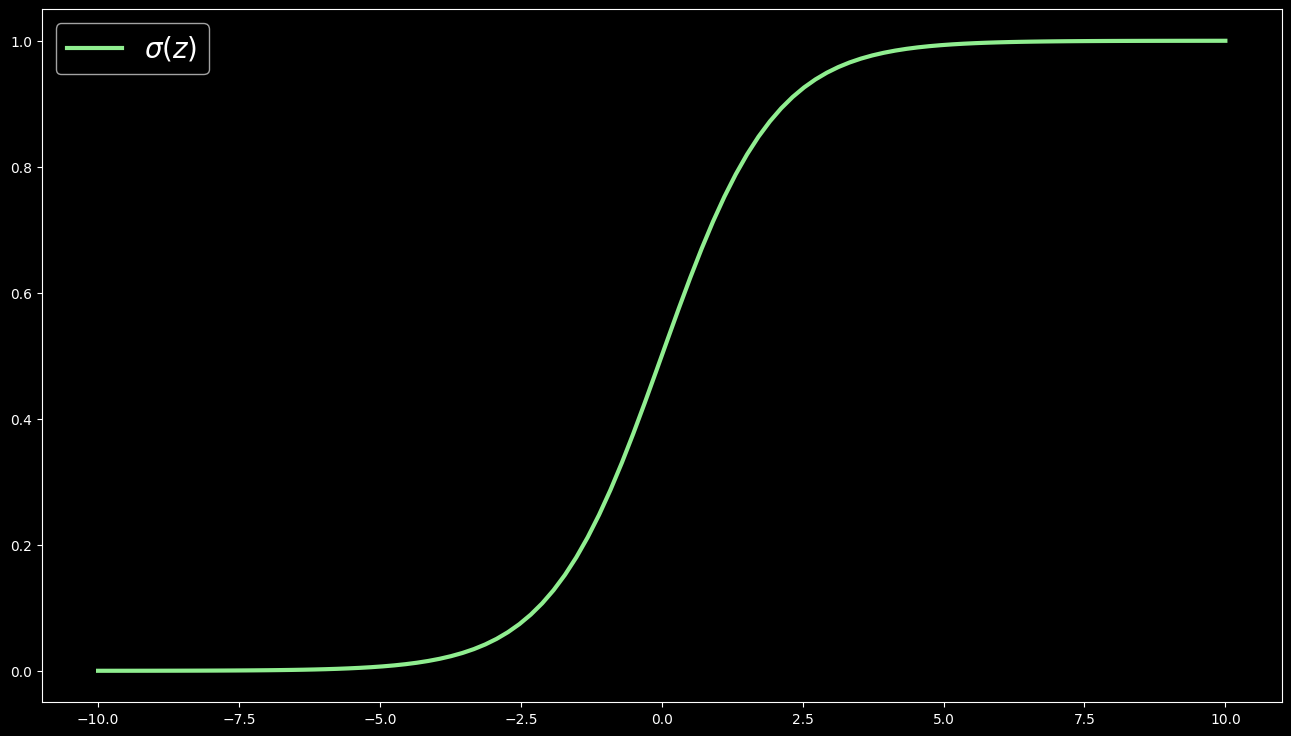

In [2]:
import matplotlib.pyplot as plt
z = np.linspace(-10, 10, 100)
# get sigmoid output
y = sigmoid(z)

plt.style.use("dark_background")
fig = plt.figure(figsize=(16, 9))
plt.plot(z, y, c="lightgreen", linewidth=3.0, label="$\sigma(z)$")
plt.legend(prop={'size': 20})
plt.show()

In [3]:
print('it can be used to model the probability that an input belongs to a certain class. In binary classification problems, where we have two classes, we can use the sigmoid function to calculate the probability that the input belongs to one of the two classes. If the output probability is greater than a certain threshold (e.g. 0.5), we can assign the input to that class. If the output probability is less than the threshold, we can assign the input to the other class.')

it can be used to model the probability that an input belongs to a certain class. In binary classification problems, where we have two classes, we can use the sigmoid function to calculate the probability that the input belongs to one of the two classes. If the output probability is greater than a certain threshold (e.g. 0.5), we can assign the input to that class. If the output probability is less than the threshold, we can assign the input to the other class.


In [4]:
df = pd.read_csv(r"C:\Users\sohit\Downloads\Logistic_regression_ls.csv")


In [5]:
df

,x1,x2,label
0,7.395,7.638,1
1,4.987,6.485,1
2,5.358,6.499,1
3,2.036,2.380,0
4,5.956,7.378,1
...,...,...,...
495,0.304,1.608,0
496,6.140,4.261,1
497,6.579,6.231,1
498,2.555,0.446,0


In [6]:
df.isna().sum()

x1       0
x2       0
label    0
dtype: int64

In [7]:
x1= df["x1"]
x2 = df["x2"]
y = df['label']

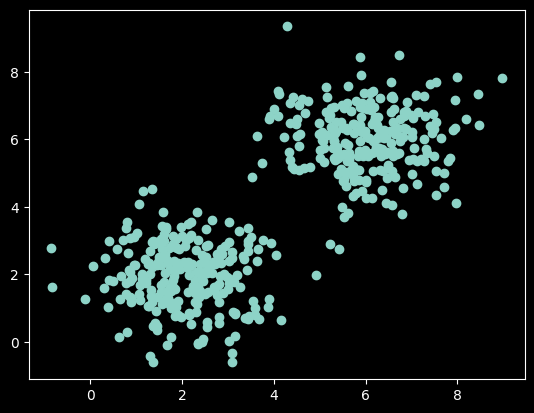

In [8]:
plt.scatter(x1, x2 )

In [9]:
def h(z):
    return 1/(1 + np.exp(-z))
def j(w):
    sum=0
    for i in range(len(y)):
        xi=w[0]+w[1]*x1[i]+w[2]*x2[i]
        sum+=(h(xi)-y[i])**2
    return sum/(2*len(y))

In [10]:
#defining the cost function
def cross_entropy(w,x,b):
    if b==1:
        return -np.log(h(w[0]+w[1]*x[0]+w[2]*x[1]))
    else:
        return -np.log(1-h(w[0]+w[1]*x[0]+w[2]*x[1]))
def cost_fun(w):
    cost=0
    for i in range(len(y)):
        cost+=cross_entropy(w,[x1[i],x2[i]],y[i])
    return cost/len(y)
def grad_cost_fun(w):
    gradc=[]
    for i in range(3):
        sum=0
        x0=[1 for i in range(len(y))]
        features=[x0,x1,x2]
        for j in range(len(y)):
            sum+=(h(w[0]+w[1]*x1[j]+w[2]*x2[j])-y[j])*features[i][j]
        gradc.append(sum/len(y))
    return np.array(gradc)

In [11]:
def SteepestDescent(f,gradf,initialGuess=np.array([0,0,0]),iterations=200,tolerance=10**-5,StepL=0.3):
    k=0
    w_0=initialGuess
    while k<iterations and np.linalg.norm(gradf(w_0))>tolerance:
        p=-gradf(w_0)
        w_0=w_0+StepL*p
        k=k+1
    print('minimum value will be:',f(w_0),'at',w_0,'Number of iterations:',k)
    return w_0,f(w_0)

In [12]:
w,value=SteepestDescent(cost_fun,grad_cost_fun)

minimum value will be: 0.10531466866532045 at [-4.71688605  0.63478908  0.66524683] Number of iterations: 200


In [13]:
def line(x):
    return (-w[0]-w[1]*x)/w[2]

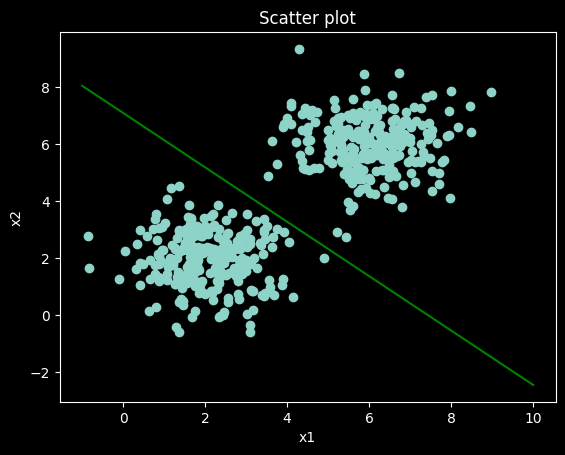

In [17]:
x=np.linspace(-1,10,100)
plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot')
plt.plot(x,line(x),color='g')
plt.show()